In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = load_data()
df['ArticleChannel'].unique()

array(['Inland', 'Meinung', 'International', 'Sport', 'Panorama',
       'Wirtschaft', 'Gesundheit', 'Web', 'Kultur', 'Bildung',
       'Wissenschaft', 'Immobilien', 'User', 'dieStandard', 'Etat',
       'Zukunft', 'Karriere', 'Lifestyle', 'Diverses', 'Reisen',
       'AutoMobil', 'Familie'], dtype=object)

In [4]:
# select categories to analyze
channels = ['Sport', 'Meinung']

filtered_df, articles_per_user, selected_users = filter_users(df, channels, min_articles=10)
print(f"Number of selected users: {len(selected_users)}")

Number of selected users: 1620


In [5]:
# create graph
weights = iom(selected_users, articles_per_user)
threshold = np.percentile(weights.flatten(), 95)
graph = build_graph(selected_users, weights, 0.2)

  0%|          | 0/1620 [00:00<?, ?it/s]

100%|██████████| 1620/1620 [00:22<00:00, 70.90it/s] 


In [6]:
# print distribution of comments in the selected categories
category_comments_percentage = filtered_df['ArticleChannel'].value_counts().div(len(filtered_df))
print(category_comments_percentage)

ArticleChannel
Meinung    0.676501
Sport      0.323499
Name: count, dtype: float64


In [7]:
# save graph for gephi
# category_count_df = most_common_category_per_user(filtered_df)
# nx.set_node_attributes(graph, category_count_df['most_common'].to_dict(), 'category')
# nx.write_gexf(graph, '../graph/iom_graph_sport_wissenschaft.gexf')

In [8]:
communities = nx.community.modularity_max.greedy_modularity_communities(graph, 'weight')
print(f"Number of communities: {len(communities)}")
print(f" Sizes of the communities: {[len(c) for c in communities]}")

Number of communities: 3
 Sizes of the communities: [1014, 600, 6]


In [25]:
# generate dataframe with number of comments (or a weighted variant, if normalized) per category for each community
community_comments_df = comments_in_category_per_community(communities,
                                                           filtered_df,
                                                           percentage=True,
                                                           weight_by_category_distribution=False)
community_comments_df.head(5)

,Meinung,Sport
0,0.956166,0.043834
1,0.193617,0.806383
2,0.694836,0.305164


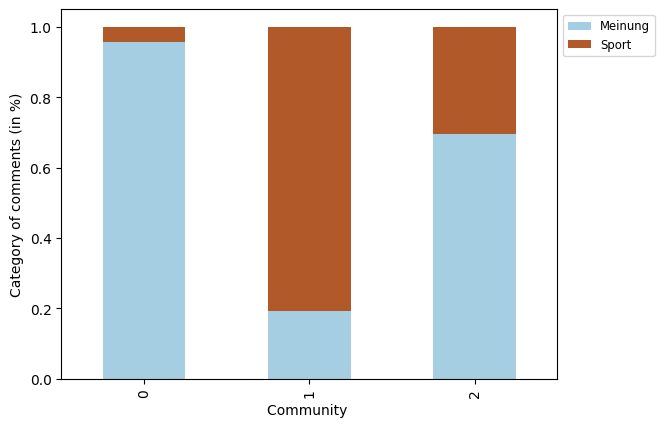

In [26]:
# plot and save results
plot = community_comments_df.plot(kind='bar',
                                  stacked=True,
                                  colormap='Paired',
                                  xlabel='Community ',
                                  ylabel='Category of comments (in %)').legend(bbox_to_anchor=(1.0, 1.0), fontsize='small')

fig = plot.get_figure()
fig.savefig('../plots/test.svg')

In [ ]:
#TODO: measures to compare results of algorithms